# Pareto front

In [1]:
import matplotlib.pyplot as plt
from analysis import load_json, convert_rate
from analysis.aoi import plot_pareto

In [2]:
%matplotlib inline

## No additional delay

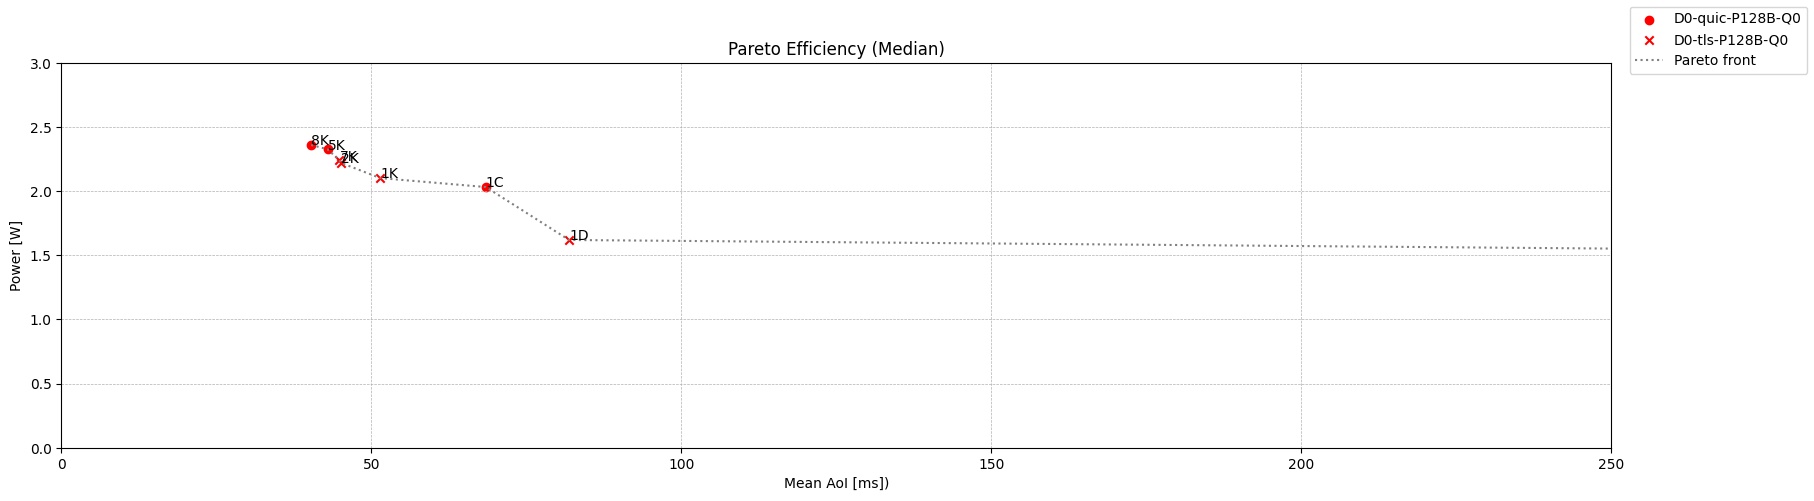

In [3]:
aoi_128B_D0 = load_json('../results/aoi/aoi_128B_D0.json')

del_keys = []
for key in aoi_128B_D0.keys():
    for sub_key in aoi_128B_D0[key].keys():
        if 'Q0' not in sub_key:
            del_keys.append((key, sub_key))
for key, sub_key in del_keys:
    del aoi_128B_D0[key][sub_key]

front_D0 = plot_pareto(aoi_128B_D0['mean_aoi'], aoi_128B_D0['median_aoi'], aoi_128B_D0['energy'], aoi_128B_D0['time'], metric='median')

# Delay 20

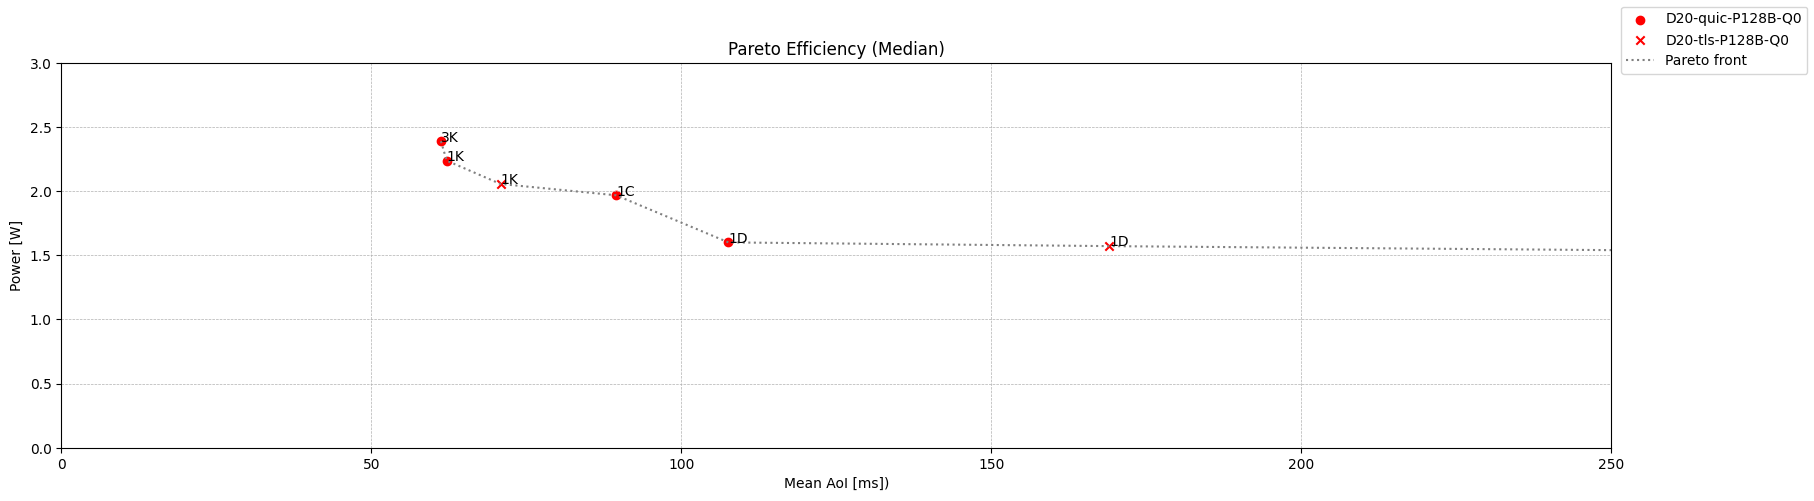

In [4]:
aoi_128B_D20 = load_json('../results/aoi/aoi_128B_D20.json')

del_keys = []
for key in aoi_128B_D20.keys():
    for sub_key in aoi_128B_D20[key].keys():
        if 'Q0' not in sub_key:
            del_keys.append((key, sub_key))
for key, sub_key in del_keys:
    del aoi_128B_D20[key][sub_key]

front_D20 = plot_pareto(aoi_128B_D20['mean_aoi'], aoi_128B_D20['median_aoi'], aoi_128B_D20['energy'], aoi_128B_D20['time'], metric='median')

## Delay 40 

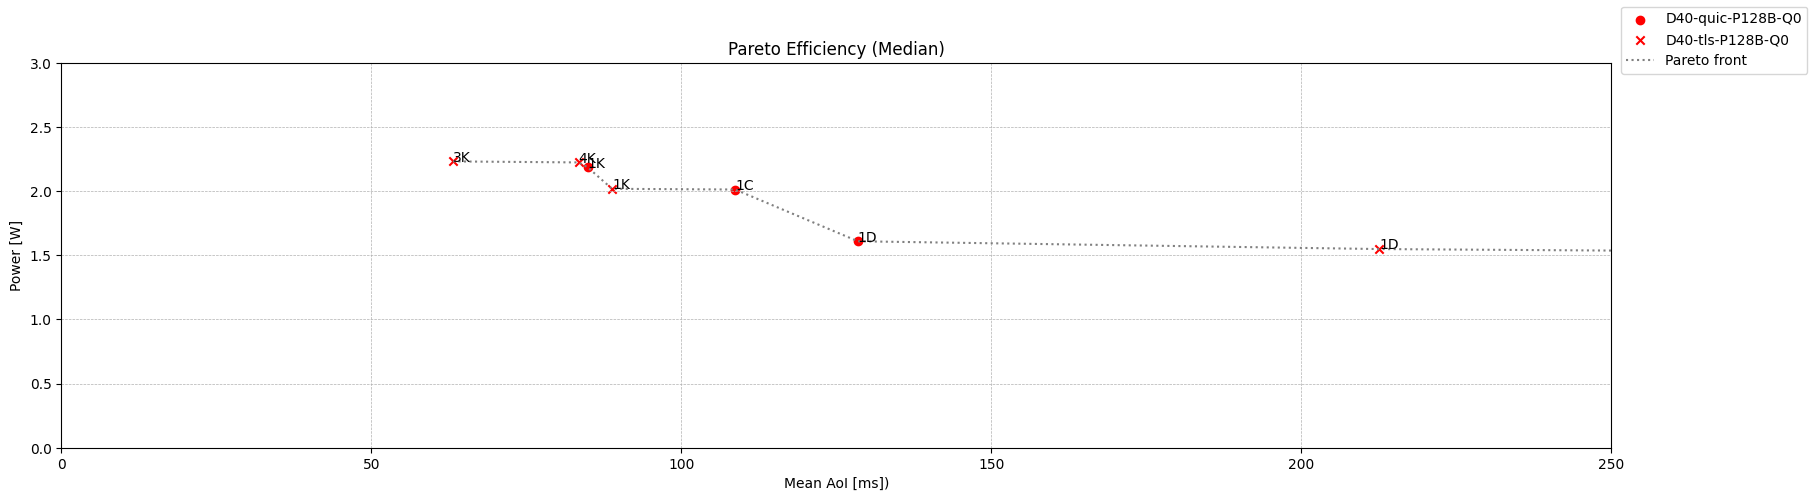

In [5]:
aoi_128B_D40 = load_json('../results/aoi/aoi_128B_D40.json')

del_keys = []
for key in aoi_128B_D40.keys():
    for sub_key in aoi_128B_D40[key].keys():
        if 'Q0' not in sub_key:
            del_keys.append((key, sub_key))
for key, sub_key in del_keys:
    del aoi_128B_D40[key][sub_key]

front_D40 = plot_pareto(aoi_128B_D40['mean_aoi'], aoi_128B_D40['median_aoi'], aoi_128B_D40['energy'], aoi_128B_D40['time'], metric='median')

## Delay 60

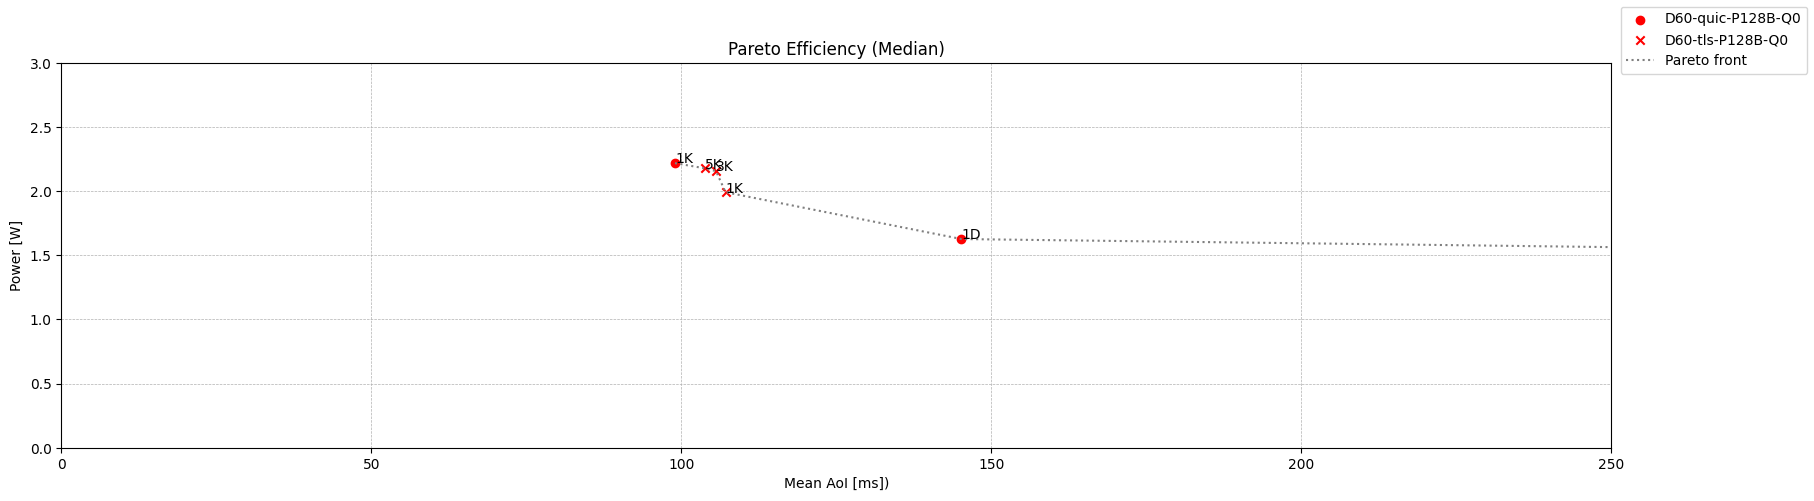

In [6]:
aoi_128B_D60 = load_json('../results/aoi/aoi_128B_D60.json')

del_keys = []
for key in aoi_128B_D60.keys():
    for sub_key in aoi_128B_D60[key].keys():
        if 'Q0' not in sub_key:
            del_keys.append((key, sub_key))
for key, sub_key in del_keys:
    del aoi_128B_D60[key][sub_key]

front_D60 = plot_pareto(aoi_128B_D60['mean_aoi'], aoi_128B_D60['median_aoi'], aoi_128B_D60['energy'], aoi_128B_D60['time'], metric='median')

## Delay 80

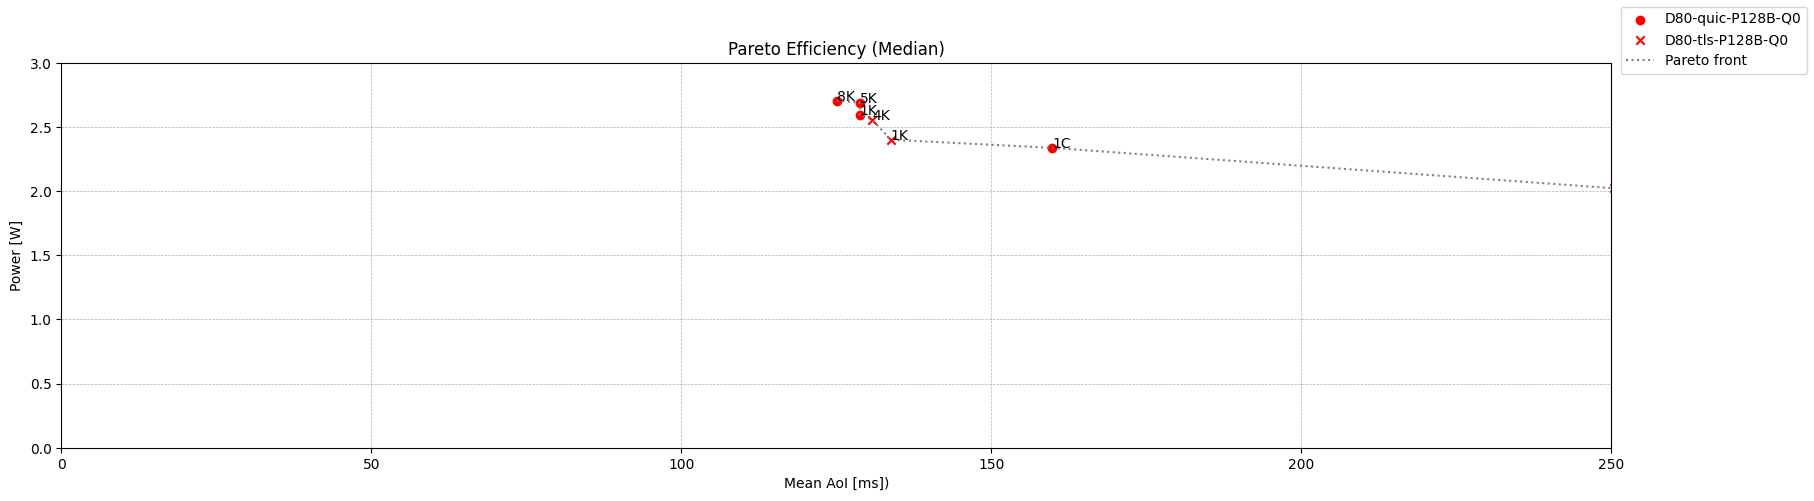

In [7]:
aoi_128B_D80 = load_json('../results/aoi/aoi_128B_D80.json')

del_keys = []
for key in aoi_128B_D80.keys():
    for sub_key in aoi_128B_D80[key].keys():
        if 'Q0' not in sub_key:
            del_keys.append((key, sub_key))
for key, sub_key in del_keys:
    del aoi_128B_D80[key][sub_key]

front_D80 = plot_pareto(aoi_128B_D80['mean_aoi'], aoi_128B_D80['median_aoi'], aoi_128B_D80['energy'], aoi_128B_D80['time'], metric='median')

# Pareto front summary

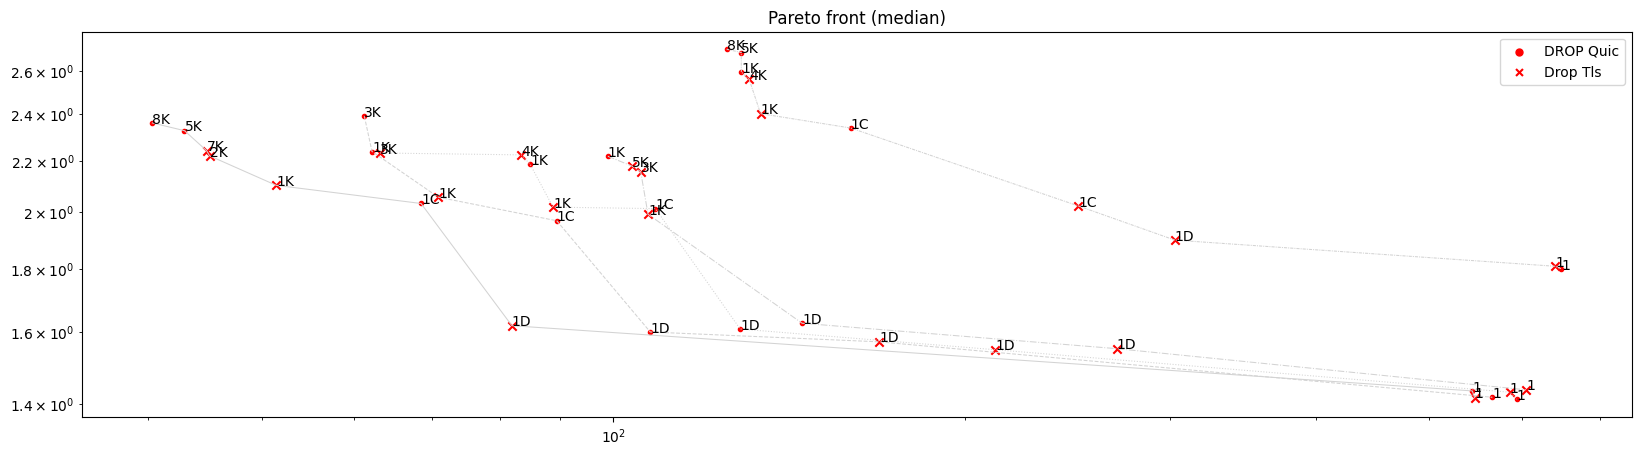

In [8]:
%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize=(20, 5))
ax.set_title('Pareto front (median)')

ax.plot(front_D0['aoi'], front_D0['power'], color='lightgray', linewidth=0.75, linestyle='-', label='No delay')    
ax.plot(front_D20['aoi'], front_D20['power'], color='lightgray', linewidth=0.75, linestyle='--', label='Delay 20ms')
ax.plot(front_D40['aoi'], front_D40['power'], color='lightgray',  linewidth=0.75, linestyle=':', label='Delay 40ms')
ax.plot(front_D60['aoi'], front_D60['power'], color='lightgray', linewidth=0.75, linestyle='-.', label='Delay 60ms')
ax.plot(front_D80['aoi'], front_D80['power'], color='lightgray', linewidth=0.75, linestyle=(0, (3, 1, 1, 1)), label='Delay 80ms')

queue_color = {
    'Q0': 'red', 
    'Q1': 'orange',
    'Q16': 'green',
    'Q1024': 'blue'
}

for i in range(len(front_D0['aoi'])):
    ax.text(front_D0['aoi'][i], front_D0['power'][i], convert_rate(front_D0['rate'][i]), color='black')
    ax.scatter(front_D0['aoi'][i], front_D0['power'][i],  marker='.' if 'quic' in front_D0['config'][i] else 'x', color=queue_color[front_D0['config'][i].split('-')[-1]])    

for i in range(len(front_D20['aoi'])):
    ax.text(front_D20['aoi'][i], front_D20['power'][i], convert_rate(front_D20['rate'][i]), color='black')
    ax.scatter(front_D20['aoi'][i], front_D20['power'][i], marker='.' if 'quic' in front_D20['config'][i] else 'x', color=queue_color[front_D20['config'][i].split('-')[-1]])

for i in range(len(front_D40['aoi'])):
    ax.text(front_D40['aoi'][i], front_D40['power'][i], convert_rate(front_D40['rate'][i]), color='black')
    ax.scatter(front_D40['aoi'][i], front_D40['power'][i], marker='.' if 'quic' in front_D40['config'][i] else 'x', color=queue_color[front_D40['config'][i].split('-')[-1]])

for i in range(len(front_D60['aoi'])):

    ax.text(front_D60['aoi'][i], front_D60['power'][i], convert_rate(front_D60['rate'][i]), color='black')
    ax.scatter(front_D60['aoi'][i], front_D60['power'][i], marker='.' if 'quic' in front_D60['config'][i] else 'x', color=queue_color[front_D60['config'][i].split('-')[-1]])

    
for i in range(len(front_D80['aoi'])):
    queue = front_D80['config'][i].split('-')[-1]
    ax.text(front_D80['aoi'][i], front_D80['power'][i], convert_rate(front_D80['rate'][i]), color='black')
    ax.scatter(front_D80['aoi'][i], front_D80['power'][i], marker='.' if 'quic' in front_D80['config'][i] else 'x', color=queue_color[queue])

legend_colors = ['red', 'red']
legend_labels = ['DROP Quic', 'Drop Tls']
markers = ['o', 'x']
legend_handles = [plt.scatter([], [], color=color, s=25, marker=marker) for color, marker in zip(legend_colors, markers)]

ax.legend(legend_handles, legend_labels)

ax.set_xscale('log')
ax.set_yscale('log')
plt.show()